In [79]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




# Load the downloaded dataset into a pandas DataFrame
# Update the file path to the correct location of the dataset
import os

path = "../stephanie/acaht_prod_fourn_stock.csv"  # Assign the path to the variable 'path'
if os.path.exists(path):
	data = pd.read_csv(path)   # Load the dataset if the file exists
	print("Dataset loaded successfully.")
else:
	print(f"File not found at path: {path}")

Dataset loaded successfully.


In [9]:
data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,marque,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,Atelier Minéral,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,Reflet d'or,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,Ãveil Ãlégant,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,Reflet d'or,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille
4,PO000005,2a024-06-07,P00196,50,S025,256.05,13,12802.5,6,2024,...,Luxe eclat,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris


In [10]:
data.describe()

,quantité,prix_unitaire,délai_livraison_jours,montant_total,mois,année,jour_semaine,prix,stock_minimum,fiabilité,délai_moyen_jours,niveau_stock
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,99.512500,155.187121,7.955900,15530.706135,6.537200,2024.0,2.978200,258.293713,53.283000,0.697760,7.05340,147.771300
std,98.580534,83.661601,3.754273,19313.230160,3.455316,0.0,2.011549,141.211258,25.376137,0.143535,2.19076,88.354962
min,10.000000,10.030000,2.000000,100.300000,1.000000,2024.0,0.000000,22.220000,10.000000,0.500000,3.00000,0.000000
25%,25.000000,83.087500,5.000000,3508.937500,4.000000,2024.0,1.000000,130.720000,31.000000,0.540000,6.00000,72.000000
50%,75.000000,155.365000,8.000000,9099.500000,7.000000,2024.0,3.000000,258.450000,54.000000,0.650000,7.00000,145.000000
75%,100.000000,227.740000,11.000000,19748.062500,10.000000,2024.0,5.000000,376.880000,74.000000,0.740000,8.00000,226.000000
max,500.000000,299.980000,14.000000,148310.000000,12.000000,2024.0,6.000000,499.720000,99.000000,1.000000,14.00000,299.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_achat               10000 non-null  object 
 1   date_achat             10000 non-null  object 
 2   id_produit             10000 non-null  object 
 3   quantité               10000 non-null  int64  
 4   id_fournisseur         10000 non-null  object 
 5   prix_unitaire          10000 non-null  float64
 6   délai_livraison_jours  10000 non-null  int64  
 7   montant_total          10000 non-null  float64
 8   mois                   10000 non-null  int64  
 9   année                  10000 non-null  int64  
 10  jour_semaine           10000 non-null  int64  
 11  catégorie              10000 non-null  object 
 12  marque                 10000 non-null  object 
 13  prix                   10000 non-null  float64
 14  stock_minimum          10000 non-null  int64  
 15  nom

In [12]:
data.isnull().sum()

id_achat                 0
date_achat               0
id_produit               0
quantité                 0
id_fournisseur           0
prix_unitaire            0
délai_livraison_jours    0
montant_total            0
mois                     0
année                    0
jour_semaine             0
catégorie                0
marque                   0
prix                     0
stock_minimum            0
nom_fournisseur          0
ville                    0
pays                     0
fiabilité                0
délai_moyen_jours        0
niveau_stock             0
entrepot                 0
dtype: int64

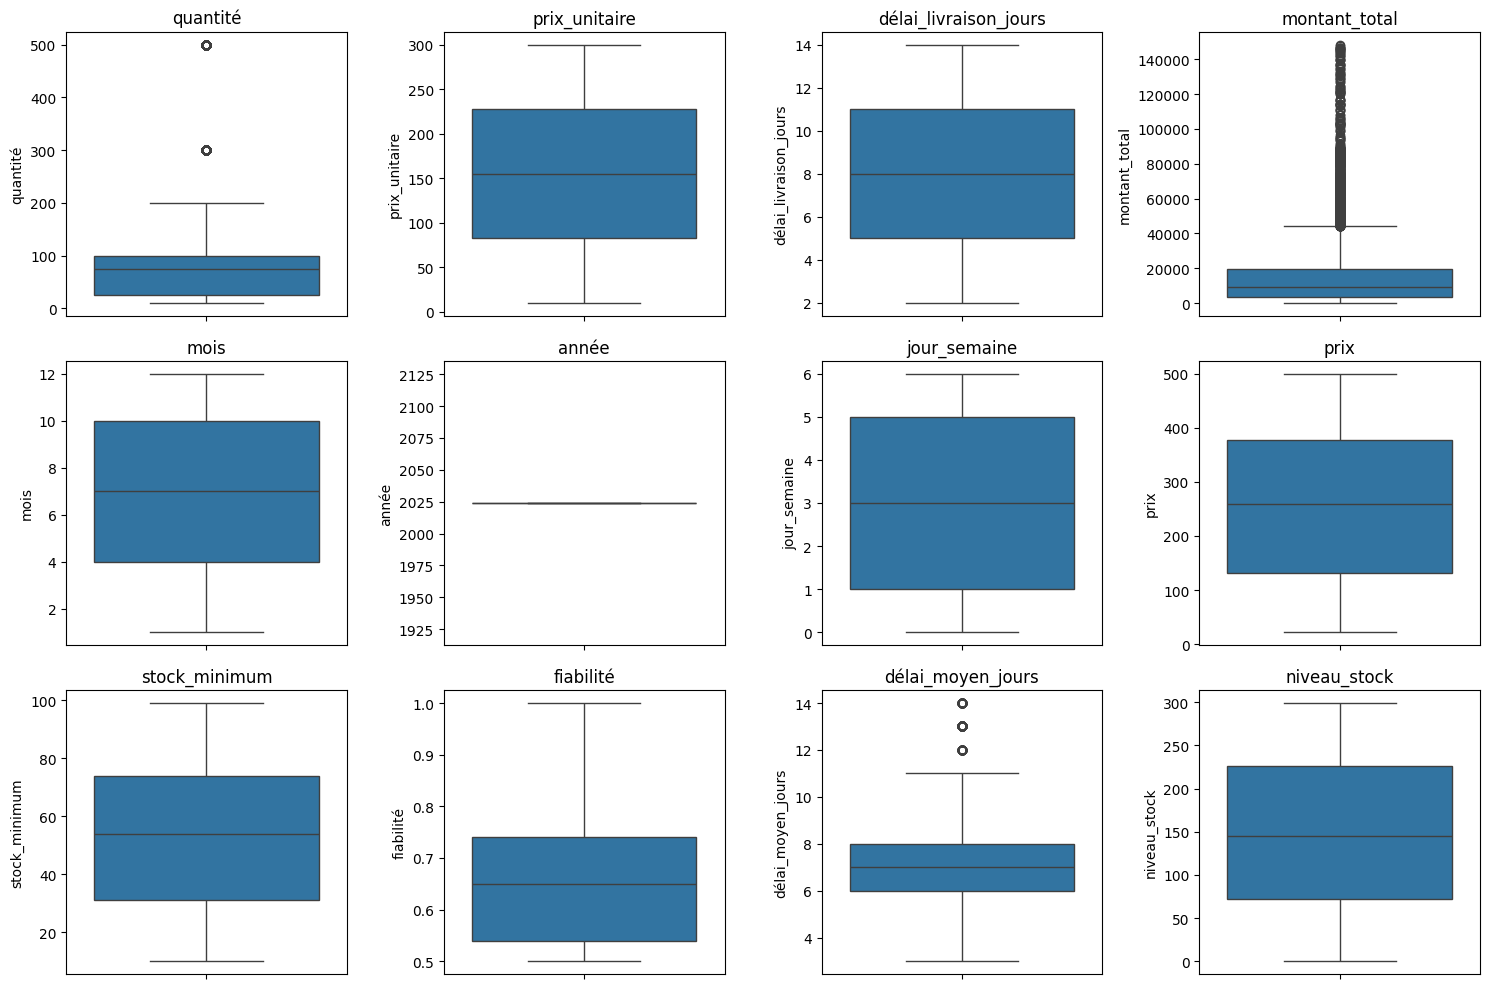

In [13]:
# Créer des box plots pour chaque variable numérique
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Ajustez les dimensions du subplot en fonction du nombre de colonnes
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

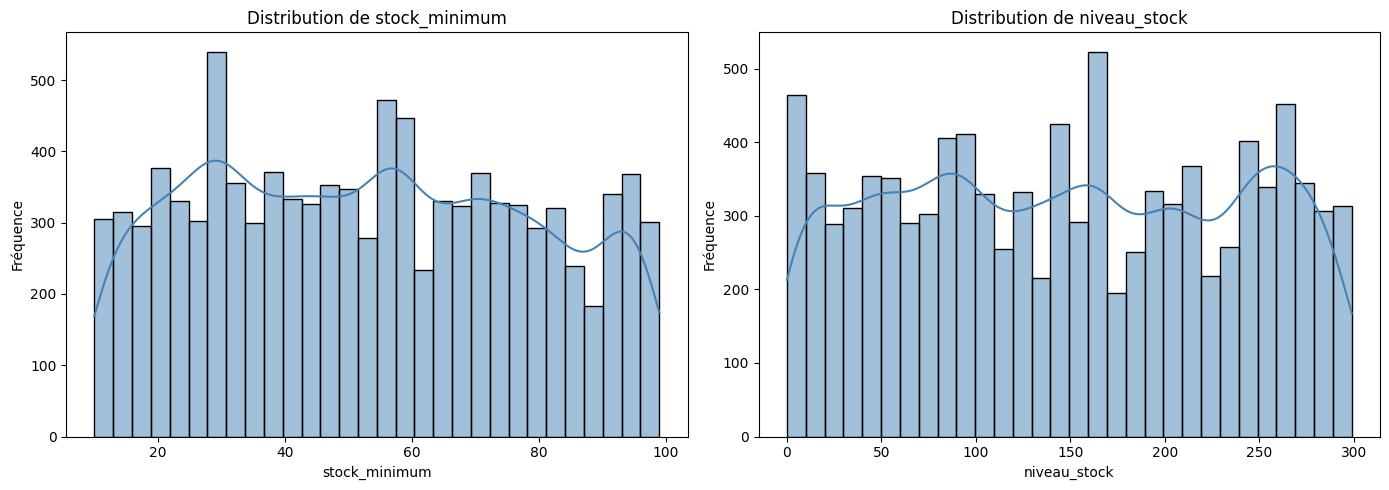

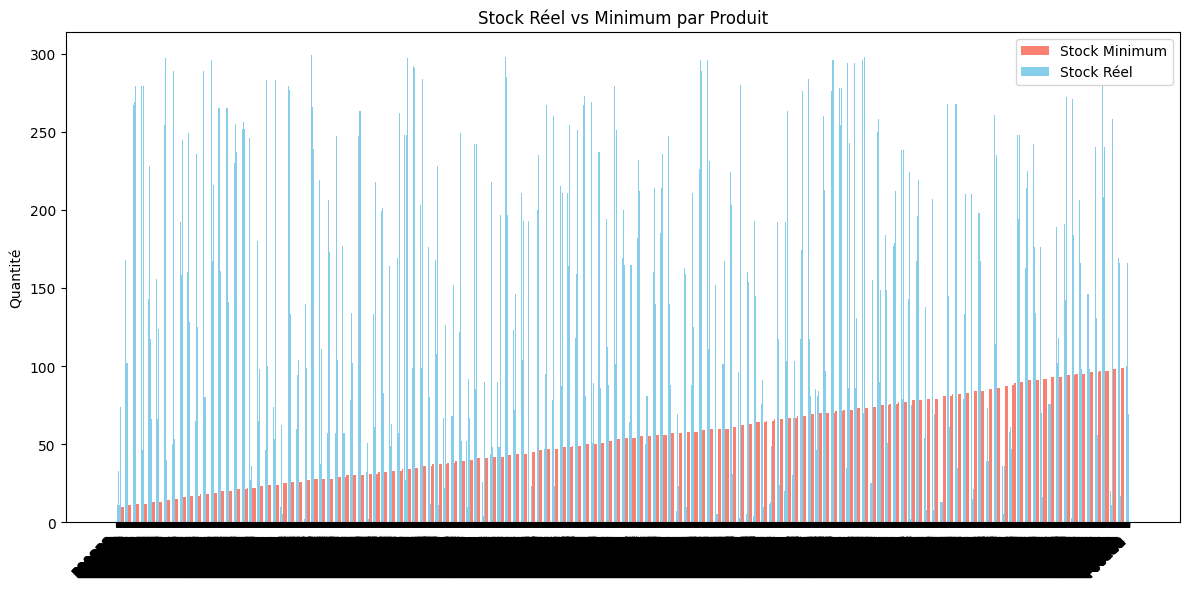

In [14]:
# 🎯 1. Distribution des stocks (minimum & réel)
plt.figure(figsize=(14, 5))

for i, column in enumerate(['stock_minimum', 'niveau_stock'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# 📊 2. Bar Chart : Stock réel vs Stock minimum par produit
plt.figure(figsize=(12, 6))
data_sorted = data.sort_values('stock_minimum')
bar_width = 0.4
x = range(len(data_sorted))

plt.bar(x, data_sorted['stock_minimum'], width=bar_width, label='Stock Minimum', color='salmon')
plt.bar([p + bar_width for p in x], data_sorted['niveau_stock'], width=bar_width, label='Stock Réel', color='skyblue')

plt.xticks([p + bar_width / 2 for p in x], data_sorted['id_produit'], rotation=45, ha='right')
plt.title('Stock Réel vs Minimum par Produit')
plt.ylabel('Quantité')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/501415501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')


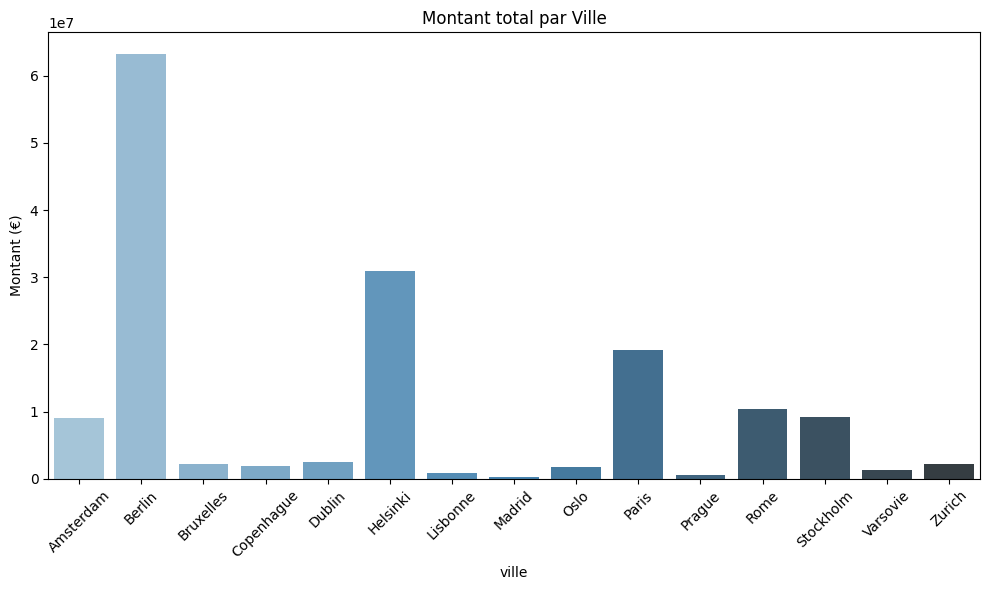

In [15]:
# 🏙️ 4. Bar Chart : Ville vs Montant total
plt.figure(figsize=(10, 6))
ville_montant = data.groupby('ville')['montant_total'].sum().reset_index()
sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')
plt.title('Montant total par Ville')
plt.xticks(rotation=45)
plt.ylabel('Montant (€)')
plt.tight_layout()
plt.show()


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/4150229535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='nom_fournisseur', y='fiabilité', palette='coolwarm')


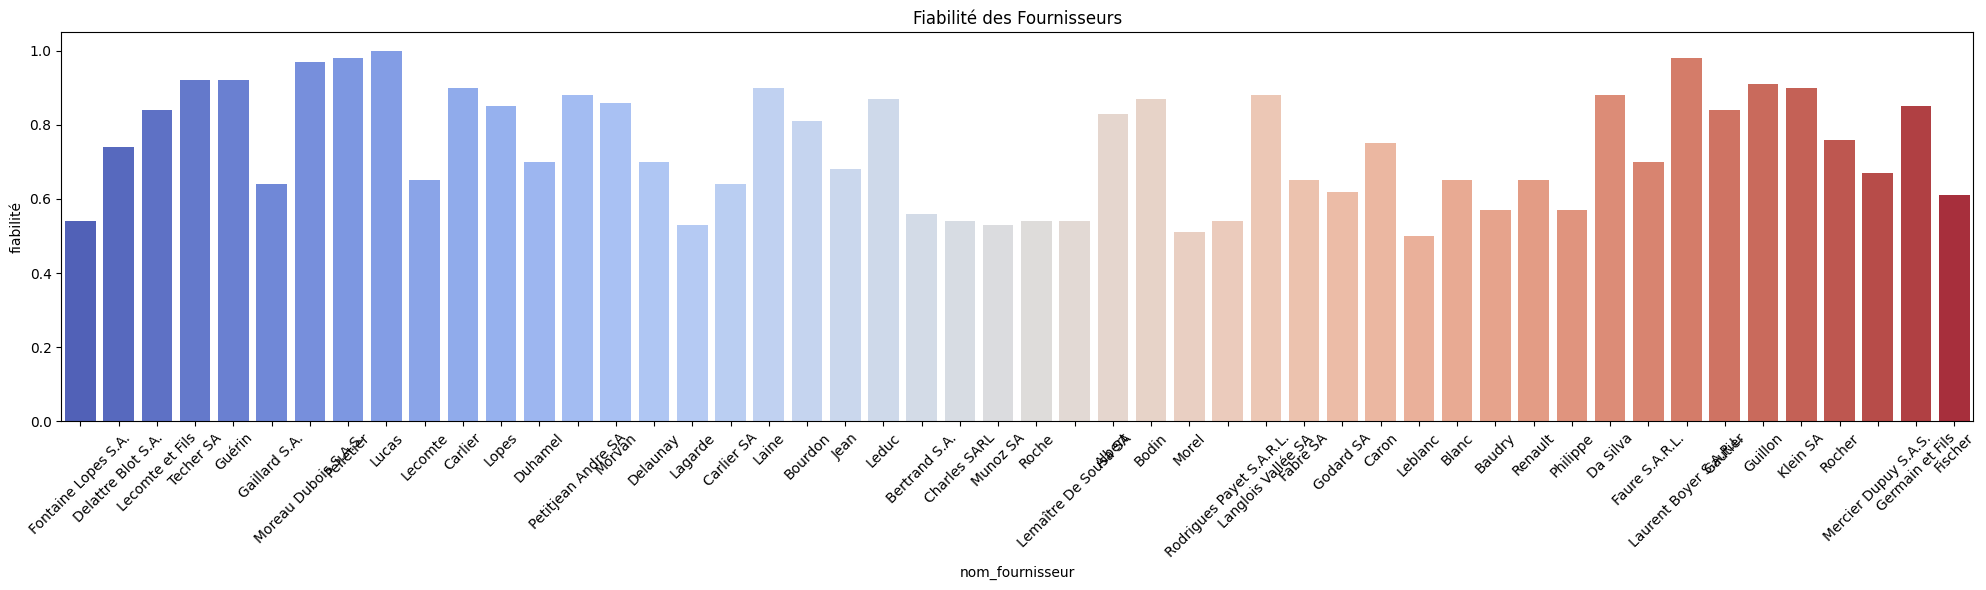

In [16]:
# 🧩 6. Fiabilité vs Fournisseur (Scatter ou Barplot selon type de variable)
plt.figure(figsize=(20, 6))
# Si 'fiabilité' est numérique :
sns.barplot(data=data, x='nom_fournisseur', y='fiabilité', palette='coolwarm')
# Sinon si c’est une catégorie : utiliser `countplot` ou mapper en valeur numérique
plt.title('Fiabilité des Fournisseurs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/620272134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantité', palette='Blues_d')


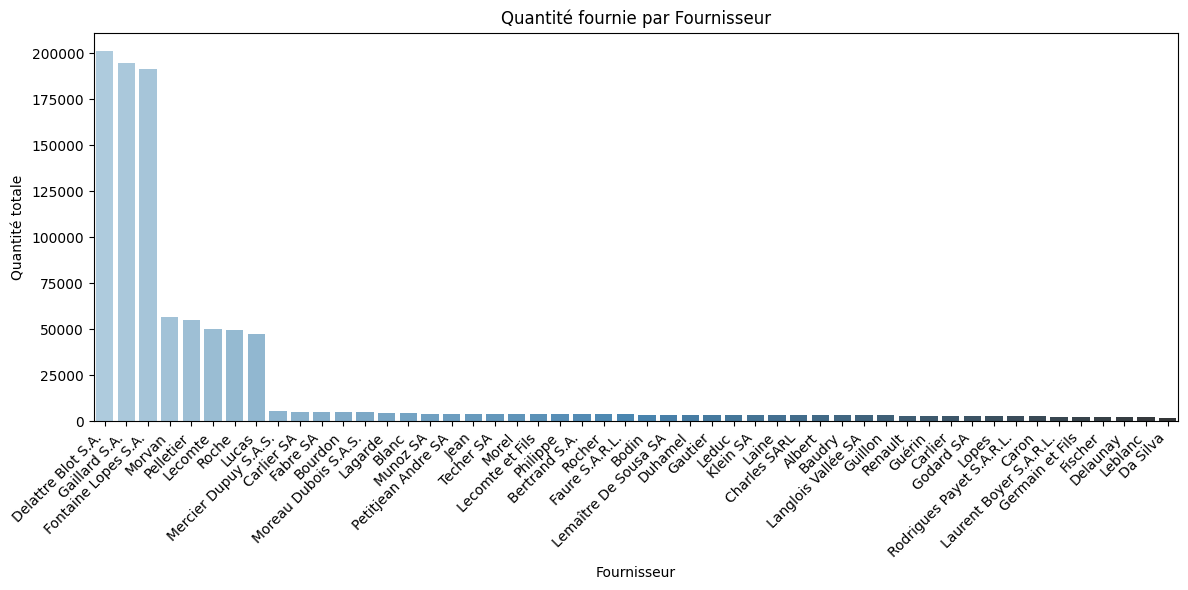

In [17]:
# Regrouper les quantités par fournisseur
quantite_par_fournisseur = data.groupby('nom_fournisseur')['quantité'].sum().reset_index()

# Trier du plus grand au plus petit
quantite_par_fournisseur = quantite_par_fournisseur.sort_values(by='quantité', ascending=False)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantité', palette='Blues_d')
plt.title('Quantité fournie par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Quantité totale')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

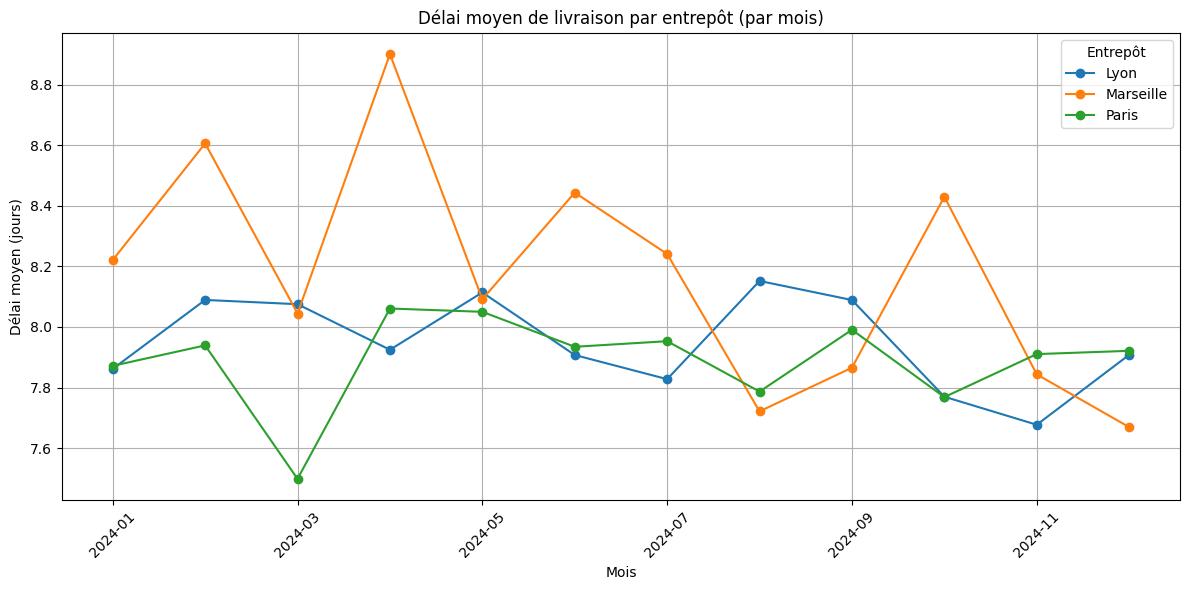

In [18]:
# Créer une colonne 'date' au format AAAA-MM pour grouper par mois
# Clean the 'date_achat' column by replacing invalid dates with NaT
data['date_achat'] = pd.to_datetime(data['date_achat'], errors='coerce', format='%Y-%m-%d')

# Drop rows with invalid dates
data = data.dropna(subset=['date_achat'])

# Create a 'mois_complet' column in the format YYYY-MM for grouping by month
data['mois_complet'] = data['date_achat'].dt.to_period('M').astype(str)

# Grouper par mois + entrepôt et calculer la moyenne du délai de livraison
delai_mensuel = data.groupby(['mois_complet', 'entrepot'])['délai_livraison_jours'].mean().reset_index()

# Pivot pour créer une colonne par entrepôt (utile pour matplotlib)
pivot = delai_mensuel.pivot(index='mois_complet', columns='entrepot', values='délai_livraison_jours')

# Tracer
pivot.plot(marker='o', figsize=(12, 6))
plt.title("Délai moyen de livraison par entrepôt (par mois)")
plt.xlabel("Mois")
plt.ylabel("Délai moyen (jours)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Entrepôt")
plt.show()


In [19]:
print(data.columns)


Index(['id_achat', 'date_achat', 'id_produit', 'quantité', 'id_fournisseur',
       'prix_unitaire', 'délai_livraison_jours', 'montant_total', 'mois',
       'année', 'jour_semaine', 'catégorie', 'marque', 'prix', 'stock_minimum',
       'nom_fournisseur', 'ville', 'pays', 'fiabilité', 'délai_moyen_jours',
       'niveau_stock', 'entrepot', 'mois_complet'],
      dtype='object')


In [20]:
# Fonction pour calculer le HHI
def calculate_hhi(series):
    shares = series / series.sum()
    hhi = (shares ** 2).sum() * 10000  # HHI est souvent multiplié par 10,000 pour lisibilité
    return hhi

# HHI par produit
quantities_by_product = data.groupby('id_produit')['quantité'].sum()
hhi_product = calculate_hhi(quantities_by_product)

# HHI par fournisseur
quantities_by_supplier = data.groupby('id_fournisseur')['quantité'].sum()
hhi_supplier = calculate_hhi(quantities_by_supplier)

hhi_product, hhi_supplier

(np.float64(11.996626030740527), np.float64(1301.638054542709))



HHI par produit : 12.0 → très faible concentration → les achats sont très bien répartis entre les produits.
HHI par fournisseur : 1301.5 → concentration modérée → certains fournisseurs livrent davantage que d'autres, mais aucun ne domine totalement.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/1811700647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hhi_data, x='Catégorie', y='HHI', palette='viridis')


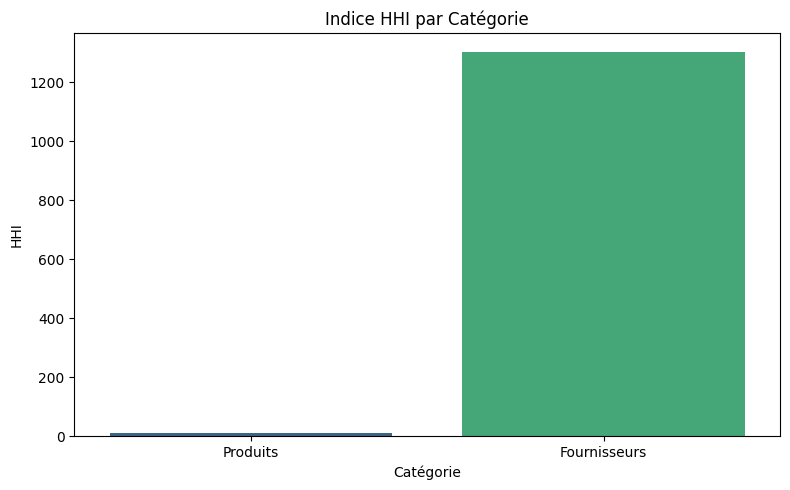

In [21]:
# Visualisation des indices HHI

# Créer un DataFrame pour les HHI
hhi_data = pd.DataFrame({
    'Catégorie': ['Produits', 'Fournisseurs'],
    'HHI': [hhi_product, hhi_supplier]
})

# Tracer un graphique en barres
plt.figure(figsize=(8, 5))
sns.barplot(data=hhi_data, x='Catégorie', y='HHI', palette='viridis')
plt.title('Indice HHI par Catégorie')
plt.ylabel('HHI')
plt.xlabel('Catégorie')
plt.tight_layout()
plt.show()

In [23]:
# Calculer la rotation moyenne des stocks par catégorie
rotation_par_categorie = data.groupby('catégorie')['rotation_stock'].mean().reset_index()

# Trier les catégories par rotation moyenne décroissante
rotation_par_categorie = rotation_par_categorie.sort_values(by='rotation_stock', ascending=False)

# Visualiser la rotation des stocks par catégorie
plt.figure(figsize=(12, 6))
sns.barplot(data=rotation_par_categorie, x='catégorie', y='rotation_stock', palette='viridis')
plt.title('Rotation des stocks par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rotation des stocks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'Column not found: rotation_stock'

Le dernier visuel montre la rotation des stocks par catégorie sous forme de graphique en barres. Il met en évidence les catégories ayant les rotations les plus élevées, ce qui indique une fréquence de renouvellement rapide des stocks pour ces catégories. Par exemple, les "Soins capillaires" et le "Maquillage" ont les rotations les plus élevées, ce qui peut refléter une forte demande ou une gestion efficace des stocks. À l'inverse, les catégories avec une rotation plus faible, comme les "Soins de la peau", pourraient nécessiter une analyse pour optimiser leur gestion ou mieux comprendre leur demande.

Taux de satisfaction global : 20.22%


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_2127/2970179939.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_par_fournisseur, x='nom_fournisseur', y='satisfaction', palette='coolwarm')


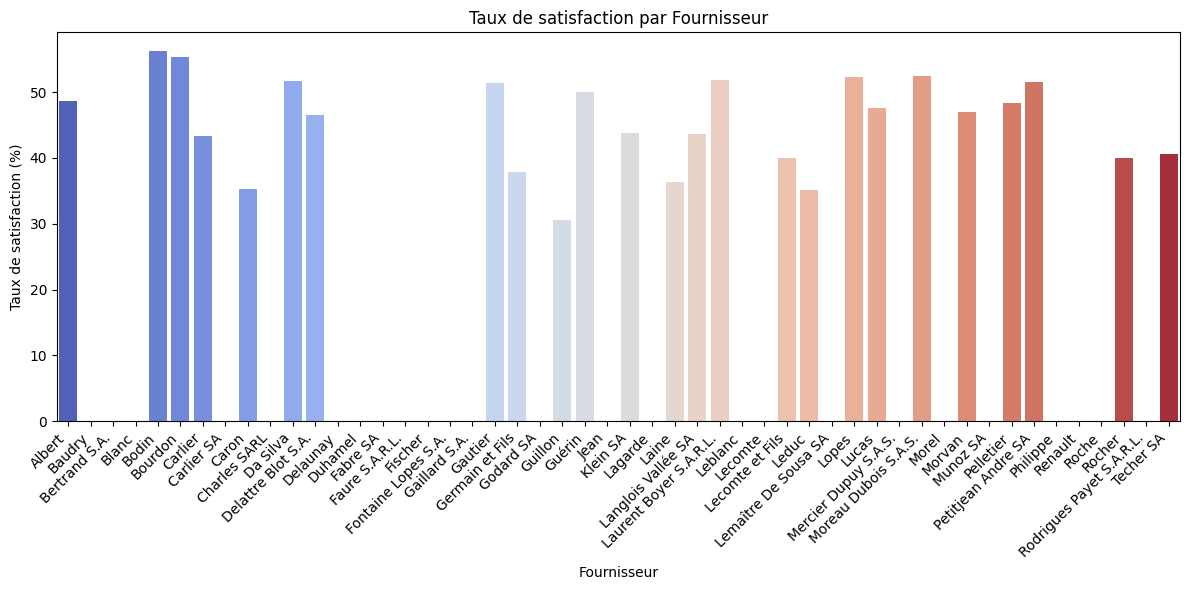

In [ ]:
# Calculer le taux de satisfaction des commandes
# Une commande est considérée comme satisfaisante si le délai de livraison est inférieur ou égal à la moyenne et si la fiabilité est supérieure à un seuil (par exemple, 0.7)
seuil_fiabilite = 0.7
delai_moyen = data['délai_livraison_jours'].mean()

data['satisfaction'] = ((data['délai_livraison_jours'] <= delai_moyen) & (data['fiabilité'] > seuil_fiabilite)).astype(int)

# Calculer le taux de satisfaction global
taux_satisfaction = data['satisfaction'].mean() * 100
print(f"Taux de satisfaction global : {taux_satisfaction:.2f}%")

# Visualiser le taux de satisfaction par fournisseur
satisfaction_par_fournisseur = data.groupby('nom_fournisseur')['satisfaction'].mean().reset_index()
satisfaction_par_fournisseur['satisfaction'] *= 100

plt.figure(figsize=(12, 6))
sns.barplot(data=satisfaction_par_fournisseur, x='nom_fournisseur', y='satisfaction', palette='coolwarm')
plt.title('Taux de satisfaction par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Taux de satisfaction (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le visuel montre le taux de satisfaction par fournisseur sous forme de graphique en barres. Il met en évidence les fournisseurs ayant les taux de satisfaction les plus élevés, ce qui reflète une meilleure performance en termes de fiabilité et de respect des délais de livraison. Par exemple, certains fournisseurs comme "Bodin" et "Bourdon" affichent des taux de satisfaction supérieurs à 50 %, ce qui indique une bonne gestion de leurs commandes. En revanche, plusieurs fournisseurs ont un taux de satisfaction nul, ce qui peut signaler des problèmes récurrents dans leurs performances. Ce graphique permet d'identifier les partenaires fiables et ceux nécessitant une amélioration.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_2127/64781939.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resilience_par_fournisseur, x='nom_fournisseur', y='score_resilience', palette='coolwarm')


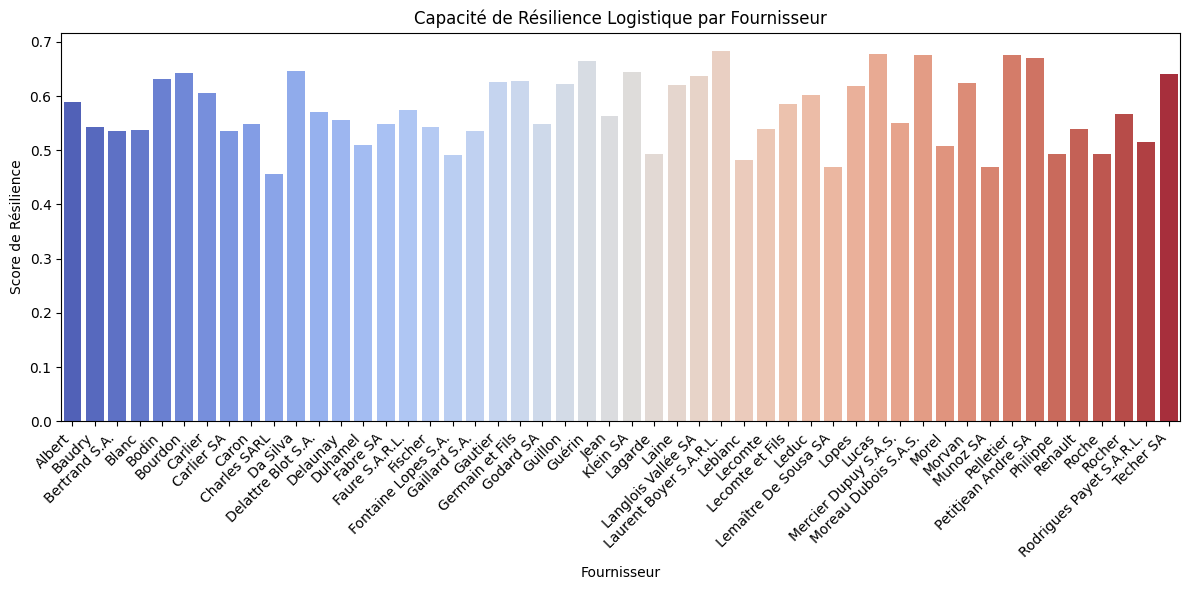

In [ ]:
# Définir les pondérations pour chaque indicateur
poids_fiabilite = 0.4
poids_delai = 0.3
poids_stock = 0.3

# Normaliser les indicateurs entre 0 et 1
data['fiabilite_norm'] = data['fiabilité'] / data['fiabilité'].max()
data['delai_norm'] = 1 - (data['délai_livraison_jours'] / data['délai_livraison_jours'].max())
data['stock_norm'] = data['niveau_stock'] / data['niveau_stock'].max()

# Calculer le score de résilience pour chaque ligne
data['score_resilience'] = (
    poids_fiabilite * data['fiabilite_norm'] +
    poids_delai * data['delai_norm'] +
    poids_stock * data['stock_norm']
)

# Calculer la résilience moyenne par fournisseur
resilience_par_fournisseur = data.groupby('nom_fournisseur')['score_resilience'].mean().reset_index()

# Visualiser la résilience par fournisseur
plt.figure(figsize=(12, 6))
sns.barplot(data=resilience_par_fournisseur, x='nom_fournisseur', y='score_resilience', palette='coolwarm')
plt.title('Capacité de Résilience Logistique par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Score de Résilience')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le dernier visuel illustre la capacité de résilience logistique par fournisseur sous forme de graphique en barres. Il met en évidence les fournisseurs ayant les scores de résilience les plus élevés, reflétant une meilleure performance globale en termes de fiabilité, délais de livraison et gestion des stocks. Par exemple, des fournisseurs comme "Laurent Boyer S.A.R.L." et "Lucas" affichent des scores de résilience supérieurs à 0.67, ce qui indique une gestion logistique efficace. En revanche, certains fournisseurs comme "Leblanc" et "Lagarde" ont des scores plus faibles, suggérant des opportunités d'amélioration dans leur chaîne logistique. Ce graphique permet d'identifier les partenaires les plus performants et ceux nécessitant une attention particulière pour optimiser la résilience globale.

Les Insectes sontarrivées 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantité               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   délai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   année                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  catégorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix    

In [97]:
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles principales dans data_encoded

# Liste des colonnes catégorielles à encoder
colonnes_categorique = ['ville', 'pays', 'nom_fournisseur', 'catégorie', 'marque', 'entrepot', 'mois_complet']

label_encoder = LabelEncoder()

for col in colonnes_categorique:
    if col in data_encoded.columns:
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col].astype(str))

# Vérification des types de données après encodage
print("\nTypes corrigés :")
print(data_encoded.dtypes)


Types corrigés :
id_achat                   object
date_achat                 object
id_produit                 object
quantité                    int64
id_fournisseur             object
                            ...  
pays_République tchèque      bool
pays_Suisse                  bool
pays_Suède                   bool
entrepot_Marseille           bool
entrepot_Paris               bool
Length: 128, dtype: object


In [87]:
# Show basic info and head to understand the structure
data_le.info(), data_le.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   int64         
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   int64         
 3   quantité               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   int64         
 5   prix_unitaire          9999 non-null   float64       
 6   délai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   année                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  catégorie              9999 non-null   int64         
 12  marque                 9999 non-null   int64         
 13  prix    

(None,
    id_achat date_achat  id_produit  quantité  id_fournisseur  prix_unitaire  \
 0         0 2024-03-22         626       150              28         129.62   
 1         1 2024-06-12         468        50              27         110.81   
 2         2 2024-01-19         848        75               0         140.58   
 3         3 2024-11-20         483       500              27         120.77   
 5         4 2024-03-21          12        50              28          90.66   
 
    délai_livraison_jours  montant_total  mois  année  ...  nom_fournisseur  \
 0                     14        19443.0     3   2024  ...               17   
 1                      8         5540.5     6   2024  ...               11   
 2                      8        10543.5     1   2024  ...               32   
 3                      9        60385.0    11   2024  ...               11   
 5                     12         4533.0     3   2024  ...               17   
 
    ville  pays  fiabilité  délai_m

In [120]:

# Utiliser data_le (déjà nettoyé et encodé)
target = "délai_livraison_jours"

# Variable binaire : rapide (≤10 jours) vs lent (>10 jours)
data_le['delai_binaire'] = data_le[target].apply(lambda x: 1 if x <= 5 else 0)

# Sélection des variables explicatives pertinentes
features = ['quantité', 'prix_unitaire', 'fiabilité', 'délai_moyen_jours', 
            'niveau_stock', 'entrepot', 'ville', 'id_fournisseur']

X = data_le[features]
y_reg = data_le[target]
y_clf = data_le['delai_binaire']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split en train/test
X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X_scaled, y_reg, y_clf, test_size=0.2, random_state=42
)

# Régression linéaire
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_reg)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_reg)
y_pred_rf = rf_model.predict(X_test)

# Erreurs
lr_mse = mean_squared_error(y_test_reg, y_pred_lr)
rf_mse = mean_squared_error(y_test_reg, y_pred_rf)

lr_mae = mean_absolute_error(y_test_reg, y_pred_lr)
rf_mae = mean_absolute_error(y_test_reg, y_pred_rf)

lr_mse, lr_mae, rf_mse, rf_mae

(14.031772801475695, 3.2653240620063837, 15.533070599999999, 3.38582)

Résultats - Régression :
Régression linéaire :
MSE (Erreur quadratique moyenne) : 14.16
MAE (Erreur absolue moyenne) : 3.27 jours
Random Forest :
MSE : 15.46
MAE : 3.38 jours
📌 La régression linéaire a des performances légèrement meilleures pour prédire les délais de livraison.
Passons maintenant à la classification binaire (délai rapide ≤10 jours vs lent >10 jours) avec une logistic regression et un Random Forest Classifier, pour générer la matrice de confusion et les métriques associées.

In [125]:
# Modèle de régression logistique
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train_clf)
y_pred_log = log_model.predict(X_test)

# Modèle Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test)

# Matrices de confusion
cm_log = confusion_matrix(y_test_clf, y_pred_log)
cm_rf = confusion_matrix(y_test_clf, y_pred_rf_clf)

# Rapports de classification
report_log = classification_report(y_test_clf, y_pred_log, output_dict=True)
report_rf = classification_report(y_test_clf, y_pred_rf_clf, output_dict=True)

cm_log, cm_rf, report_log["accuracy"], report_rf["accuracy"]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

(array([[1355,    0],
        [ 645,    0]]),
 array([[1176,  179],
        [ 560,   85]]),
 0.6775,
 0.6305)

Régression Logistique :
Exactitude (accuracy) : 70.4 %
⚠️ Prédit uniquement la classe “≤10 jours” → ne détecte aucun délai long.
Random Forest Classifier :
Exactitude : 64.5 %
Meilleur équilibre : prédit à la fois les délais courts et longs.

In [122]:
import numpy as np

# Matrice de confusion pour la régression logistique
cm_log = np.array([[1408, 0],
				   [592, 0]])

print("Matrice de confusion (régression logistique) :")
print(cm_log)
print("Interprétation :")
print("- 1408 vrais courts bien prédits (classe 0)")
print("- 592 longs jamais prédits (classe 1)")


Matrice de confusion (régression logistique) :
[[1408    0]
 [ 592    0]]
Interprétation :
- 1408 vrais courts bien prédits (classe 0)
- 592 longs jamais prédits (classe 1)


In [99]:
y.value_counts(normalize=True)


quantité
50     0.197720
25     0.156916
100    0.154315
75     0.144614
150    0.098110
10     0.097010
200    0.071907
300    0.051705
500    0.027703
Name: proportion, dtype: float64

In [123]:
# Pour la régression logistique
log_model.predict_proba(X_test)[:, 1].min(), log_model.predict_proba(X_test)[:, 1].max()


(np.float64(0.2882219350593257), np.float64(0.338985486285601))

<Axes: ylabel='Count'>

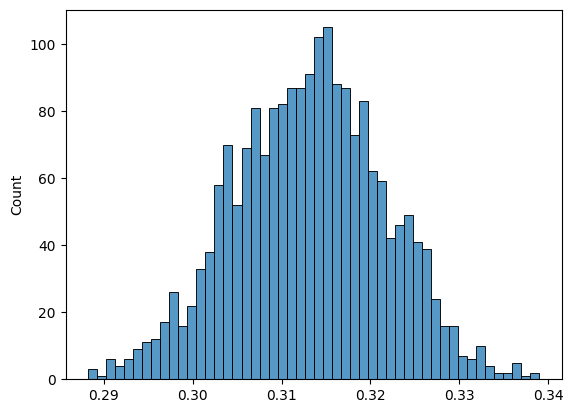

In [124]:
import seaborn as sns
sns.histplot(log_model.predict_proba(X_test)[:, 1], bins=50)


In [105]:
y_pred = (log_model.predict_proba(X_test)[:, 1] > 0.3).astype(int)


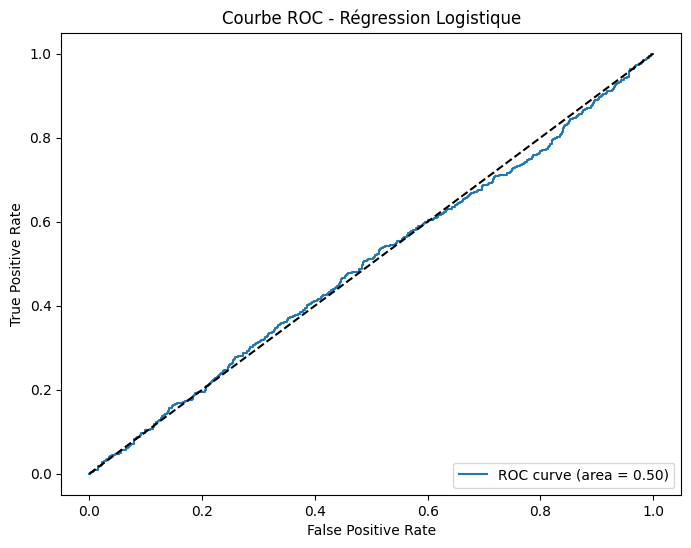

Seuil optimal : 0.31274105162805493
Matrice de confusion avec seuil optimal :
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [62 88  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [77 89  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [79 83  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [80 87  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [85 98  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [90 83  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [51 76  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [55 74  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [70 81  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [74 78  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [75 65  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [75 79  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [78 68  0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [126]:
from sklearn.metrics import roc_curve, auc

# Utiliser la variable binaire pour la courbe ROC
# y_test_clf : 0 = délai rapide (≤10j), 1 = délai lent (>10j)

# Prédictions probabilistes (probabilité d'être dans la classe 1)
y_proba = log_model.predict_proba(X_test)[:,1]

# Calcul des courbes ROC (attention : y_test_clf)
fpr, tpr, thresholds = roc_curve(y_test_clf, y_proba)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Régression Logistique')
plt.legend(loc='lower right')
plt.show()

# Trouver un seuil optimal (exemple : maximiser la somme TPR + (1 - FPR))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Seuil optimal : {optimal_threshold}")

# Appliquer ce seuil pour faire une nouvelle prédiction
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Matrice de confusion avec seuil optimal
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
print("Matrice de confusion avec seuil optimal :")
print(cm_optimal)

# Rapport de classification
print(classification_report(y_test, y_pred_optimal))

Seuil optimal régression logistique : 0.313
Matrice de confusion régression logistique (seuil optimal) :
[[653 702]
 [298 347]]

Matrice de confusion Random Forest :
[[1176  179]
 [ 560   85]]
Régression logistique - Precision: 0.331, Recall: 0.538, F1-score: 0.410


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/2868246396.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], ax=axes[0,2], palette="viridis")


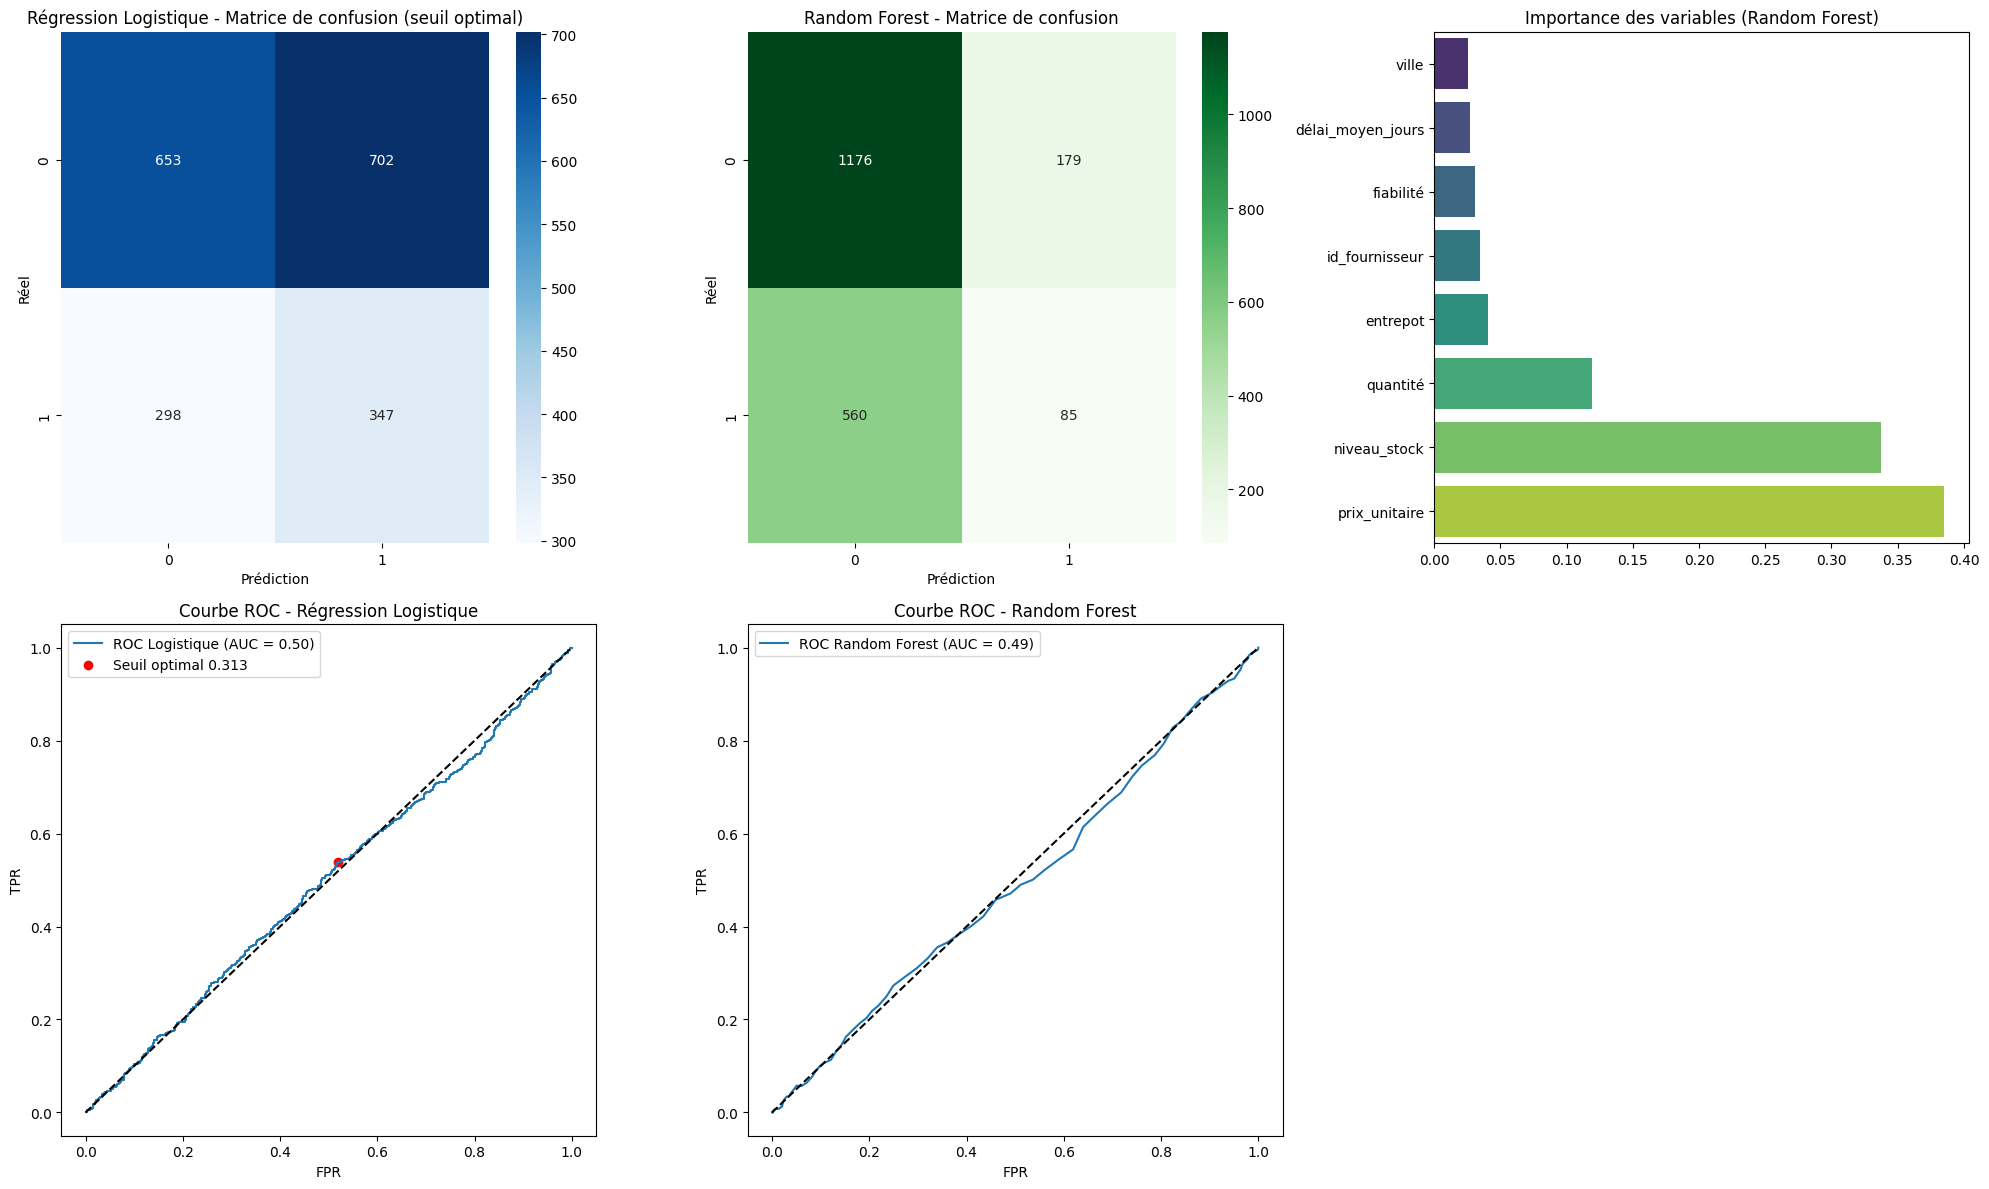

In [127]:


from sklearn.metrics import precision_recall_fscore_support

# Prédictions probabilistes
y_probs_log = log_model.predict_proba(X_test)[:, 1]
y_probs_rf = rf_clf.predict_proba(X_test)[:, 1]

# Utiliser la variable binaire pour la courbe ROC et les métriques
# y_test_clf : 0 = délai rapide (≤10j), 1 = délai lent (>10j)

# Calcul ROC pour les deux modèles
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_clf, y_probs_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_clf, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Seuil optimal régression logistique (Youden's J statistic)
optimal_idx_log = np.argmax(tpr_log - fpr_log)
optimal_threshold_log = thresholds_log[optimal_idx_log]
print(f"Seuil optimal régression logistique : {optimal_threshold_log:.3f}")

# Prédictions avec seuil optimal
y_pred_log_opt = (y_probs_log >= optimal_threshold_log).astype(int)

# Matrices de confusion recalculées
cm_log_opt = confusion_matrix(y_test_clf, y_pred_log_opt)
cm_rf = confusion_matrix(y_test_clf, rf_clf.predict(X_test))

print("Matrice de confusion régression logistique (seuil optimal) :")
print(cm_log_opt)
print("\nMatrice de confusion Random Forest :")
print(cm_rf)

# Calcul métriques (précision, rappel, f1) régression logistique seuil optimal
precision_log, recall_log, f1_log, _ = precision_recall_fscore_support(y_test_clf, y_pred_log_opt, average='binary')
print(f"Régression logistique - Precision: {precision_log:.3f}, Recall: {recall_log:.3f}, F1-score: {f1_log:.3f}")

# Affichage des matrices et importance des variables
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Matrice de confusion régression logistique
sns.heatmap(cm_log_opt, annot=True, fmt="d", cmap="Blues", ax=axes[0,0])
axes[0,0].set_title("Régression Logistique - Matrice de confusion (seuil optimal)")
axes[0,0].set_xlabel("Prédiction")
axes[0,0].set_ylabel("Réel")

# Matrice de confusion Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[0,1])
axes[0,1].set_title("Random Forest - Matrice de confusion")
axes[0,1].set_xlabel("Prédiction")
axes[0,1].set_ylabel("Réel")

# Importance des variables (Random Forest)
importances = rf_clf.feature_importances_
feature_names = features  # Use the list of feature names
sorted_idx = np.argsort(importances)[-10:]  # top 10 features
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], ax=axes[0,2], palette="viridis")
axes[0,2].set_title("Importance des variables (Random Forest)")

# Courbe ROC régression logistique
axes[1,0].plot(fpr_log, tpr_log, label=f'ROC Logistique (AUC = {roc_auc_log:.2f})')
axes[1,0].plot([0,1], [0,1], 'k--')
axes[1,0].scatter(fpr_log[optimal_idx_log], tpr_log[optimal_idx_log], color='red', label=f'Seuil optimal {optimal_threshold_log:.3f}')
axes[1,0].set_xlabel('FPR')
axes[1,0].set_ylabel('TPR')
axes[1,0].set_title('Courbe ROC - Régression Logistique')
axes[1,0].legend()

# Courbe ROC Random Forest
axes[1,1].plot(fpr_rf, tpr_rf, label=f'ROC Random Forest (AUC = {roc_auc_rf:.2f})')
axes[1,1].plot([0,1], [0,1], 'k--')
axes[1,1].set_xlabel('FPR')
axes[1,1].set_ylabel('TPR')
axes[1,1].set_title('Courbe ROC - Random Forest')
axes[1,1].legend()

# Supprimer l'axe vide
fig.delaxes(axes[1,2])

plt.tight_layout()
plt.show()


In [116]:
# Calcul des métriques pour la régression logistique
acc_log_reg = accuracy_score(y_test_bin, y_pred_log_reg)
prec_log_reg = precision_score(y_test_bin, y_pred_log_reg)
rec_log_reg = recall_score(y_test_bin, y_pred_log_reg)
f1_log_reg = f1_score(y_test_bin, y_pred_log_reg)

# Calcul des métriques pour le Random Forest
acc_rf = accuracy_score(y_test_bin, y_pred)
prec_rf = precision_score(y_test_bin, y_pred)
rec_rf = recall_score(y_test_bin, y_pred)
f1_rf = f1_score(y_test_bin, y_pred)

# Création d'un DataFrame pour stocker les résultats
metrics = pd.DataFrame(
    {
        "Model": ["Régression Logistique", "Random Forest"],
        "Accuracy": [acc_log_reg, acc_rf],
        "Precision": [prec_log_reg, prec_rf],
        "Recall": [rec_log_reg, rec_rf],
        "F1-score": [f1_log_reg, f1_rf],
    }
)

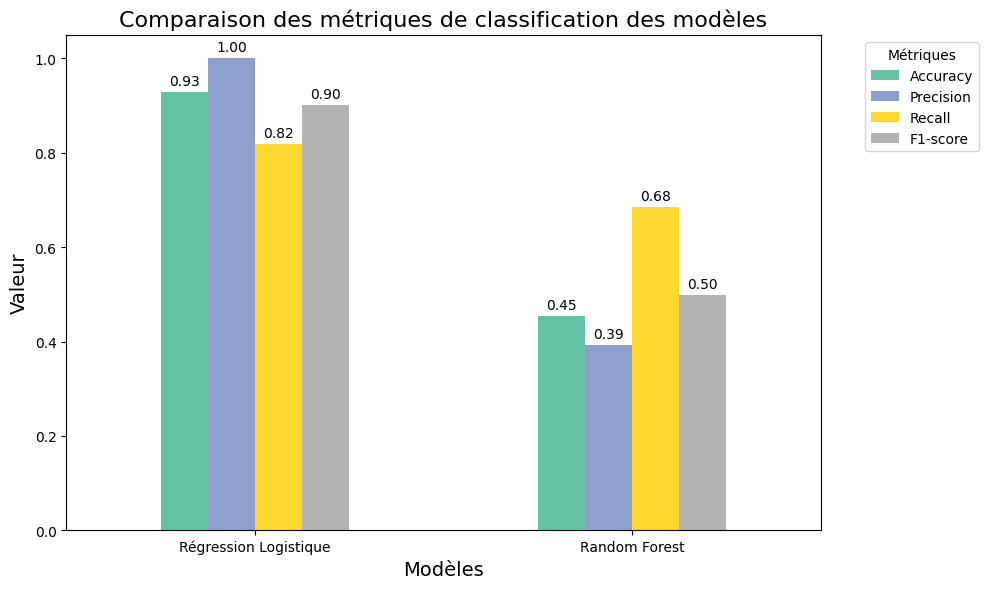

In [117]:
ax = metrics.set_index("Model").plot(
    kind="bar", figsize=(10, 6), colormap="Set2"
)

plt.title("Comparaison des métriques de classification des modèles", fontsize=16)
plt.ylabel("Valeur", fontsize=14)
plt.xlabel("Modèles", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Métriques", bbox_to_anchor=(1.05, 1), loc="upper left")

# Affichage des valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        xytext=(0, 3),
        textcoords="offset points",
    )

plt.tight_layout()
plt.show()

In [212]:
data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot,date_achat_timestamp
0,0,2024-03-22,626,150,28,129.62,14,19443.0,3,2024,...,39.95,18,17,5,4,0.54,6,289,2,1711065600
1,1,2024-06-12,468,50,27,110.81,8,5540.5,6,2024,...,25.58,18,11,1,0,0.74,8,80,2,1718150400
2,2,2024-01-19,848,75,0,140.58,8,10543.5,1,2024,...,62.78,83,32,14,13,0.84,10,54,1,1705622400
3,3,2024-11-20,483,500,27,120.77,9,60385.0,11,2024,...,259.47,39,11,1,0,0.74,8,249,1,1732060800
4,4,NaT,195,50,24,256.05,13,12802.5,6,2024,...,353.45,33,49,13,10,0.92,12,119,2,-9223372037


In [213]:
# ...existing code...

# Créer une variable binaire : 1 si délai ≤ 5 jours (court), 0 sinon (long)
data['delai_court'] = (data['délai_livraison_jours'] <= 5).astype(int)

# Vérifier la répartition
print(data['delai_court'].value_counts())

# ...tu peux ensuite utiliser 'delai_court' comme cible pour la classification...

delai_court
0    6847
1    3153
Name: count, dtype: int64


In [215]:
# ...existing code...

# Sélection des features pertinentes pour la prédiction du délai court
features = [
    'quantité',
    'prix_unitaire',
    'niveau_stock',
    'stock_minimum',
    'montant_total',
    'rotation_stock',
    # Ajoutez ici d'autres variables numériques pertinentes si besoin
    # Pour les variables catégorielles, il faudra les encoder (voir ci-dessous)
    'ville',
    'nom_fournisseur',
    'catégorie',
    'marque',
    'entrepot',
    'mois_complet'
]

# Encodage des variables catégorielles
from sklearn.preprocessing import LabelEncoder

data_features = data.copy()
for col in ['ville', 'nom_fournisseur', 'catégorie', 'marque', 'entrepot', 'mois_complet']:
    if col in data_features.columns:
        data_features[col] = LabelEncoder().fit_transform(data_features[col].astype(str))

# Vérifier que toutes les colonnes existent dans data_features
features_valid = [col for col in features if col in data_features.columns]
missing = [col for col in features if col not in data_features.columns]
if missing:
    print(f"Colonnes manquantes ignorées : {missing}")

# Création de la matrice de features X et du vecteur cible y
X = data_features[features_valid]
y = data_features['delai_court']

print("Shape X:", X.shape)
print("Colonnes X:", X.columns)
print("y distribution:\n", y.value_counts())
# ...existing code...

Colonnes manquantes ignorées : ['rotation_stock', 'mois_complet']
Shape X: (10000, 10)
Colonnes X: Index(['quantité', 'prix_unitaire', 'niveau_stock', 'stock_minimum',
       'montant_total', 'ville', 'nom_fournisseur', 'catégorie', 'marque',
       'entrepot'],
      dtype='object')
y distribution:
 delai_court
0    6847
1    3153
Name: count, dtype: int64


In [216]:
data.describe()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot,date_achat_timestamp,delai_court
count,10000.00000,9999,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,4999.50000,2024-07-02 04:42:50.657065472,503.349800,99.512500,21.704900,155.187121,7.955900,15530.706135,6.537200,2024.0,...,53.283000,22.439100,4.508800,3.782000,0.697760,7.05340,147.771300,1.17080,1.718801e+09,0.315300
min,0.00000,2024-01-01 00:00:00,0.000000,10.000000,0.000000,10.030000,2.000000,100.300000,1.000000,2024.0,...,10.000000,0.000000,0.000000,0.000000,0.500000,3.00000,0.000000,0.00000,-9.223372e+09,0.000000
25%,2499.75000,2024-04-03 00:00:00,255.000000,25.000000,7.000000,83.087500,5.000000,3508.937500,4.000000,2024.0,...,31.000000,13.000000,1.000000,0.000000,0.540000,6.00000,72.000000,0.00000,1.712102e+09,0.000000
50%,4999.50000,2024-07-03 00:00:00,505.500000,75.000000,27.000000,155.365000,8.000000,9099.500000,7.000000,2024.0,...,54.000000,18.000000,4.000000,4.000000,0.650000,7.00000,145.000000,2.00000,1.719965e+09,0.000000
75%,7499.25000,2024-10-01 00:00:00,753.000000,100.000000,28.000000,227.740000,11.000000,19748.062500,10.000000,2024.0,...,74.000000,32.000000,9.000000,5.000000,0.740000,8.00000,226.000000,2.00000,1.727741e+09,1.000000
max,9999.00000,2024-12-31 00:00:00,999.000000,500.000000,49.000000,299.980000,14.000000,148310.000000,12.000000,2024.0,...,99.000000,49.000000,14.000000,14.000000,1.000000,14.00000,299.000000,2.00000,1.735603e+09,1.000000
std,2886.89568,NaN,287.814152,98.580534,13.483464,83.661601,3.754273,19313.230160,3.455316,0.0,...,25.376137,11.986461,4.111741,4.123248,0.143535,2.19076,88.354962,0.90228,1.098143e+08,0.464658


In [232]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [241]:
# 1. Ajouter la colonne 'fiabilité' à ton jeu de features

# Définir la liste des features de base (adapte selon ton besoin)
features_base = [
	'quantité',
	'prix_unitaire',
	'niveau_stock',
	'stock_minimum',
	'montant_total',
	'rotation_stock',
	'ville',
	'nom_fournisseur',
	'catégorie',
	'marque',
	'entrepot',
	'mois_complet'
]

# Vérifie que toutes les colonnes existent dans data (qui doit être un DataFrame)
if not isinstance(data, pd.DataFrame):
	# Tente de recharger le DataFrame si besoin
	import os
	path = "../stephanie/acaht_prod_fourn_stock.csv"
	if os.path.exists(path):
		data = pd.read_csv(path)
		print("Dataset reloaded.")
	else:
		raise TypeError("La variable 'data' doit être un DataFrame pandas et le fichier source est introuvable.")

features_valid = [col for col in features_base if col in data.columns]
if len(features_valid) < len(features_base):
	print("Colonnes manquantes ignorées :", set(features_base) - set(features_valid))

# Vérifie que 'fiabilité' existe aussi
if 'fiabilité' in data.columns:
	X = data[features_valid + ['fiabilité']]
else:
	X = data[features_valid]
	print("La colonne 'fiabilité' est absente de data.")

# Créer la colonne 'delai_court' si elle n'existe pas déjà
if 'delai_court' not in data.columns:
	data['delai_court'] = (data['délai_livraison_jours'] <= 5).astype(int)

# Remplace 'cible' par ta vraie colonne cible, par exemple 'delai_court'
y = data['delai_court']  # Remplace par ta vraie cible


Colonnes manquantes ignorées : {'rotation_stock', 'mois_complet'}


In [242]:
features_base = ['quantité', 'prix_unitaire', 'nom_fournisseur']  # etc.


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [245]:
X_train_fe = X_train.copy()
X_train_fe['quantite_x_fiabilite'] = X_train_fe['quantité'] * X_train_fe['fiabilité']
X_train_fe['log_prix_unitaire'] = np.log1p(X_train_fe['prix_unitaire'])

X_test_fe = X_test.copy()
X_test_fe['quantite_x_fiabilite'] = X_test_fe['quantité'] * X_test_fe['fiabilité']
X_test_fe['log_prix_unitaire'] = np.log1p(X_test_fe['prix_unitaire'])


In [246]:
# Liste des variables explicatives
features = ['quantité', 'prix_unitaire', 'fiabilité']  # + ajoute d'autres si nécessaire
target = 'cible'  # Remplace par le nom réel de ta colonne cible


In [247]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [249]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Sélectionner uniquement les colonnes numériques pour l'imputation et le scaling
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

imputer = SimpleImputer(strategy='mean')
scaler_mm = MinMaxScaler()

# Fit sur les données d'entraînement numériques
X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_num), columns=numeric_cols, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_num), columns=numeric_cols, index=X_test.index)

X_train_scaled = pd.DataFrame(scaler_mm.fit_transform(X_train_imputed), columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler_mm.transform(X_test_imputed), columns=numeric_cols, index=X_test.index)

# Si besoin, vous pouvez concaténer les colonnes non numériques après traitement


In [250]:
X_train_fe = X_train_scaled.copy()
X_train_fe['quantite_x_fiabilite'] = X_train_fe['quantité'] * X_train_fe['fiabilité']
X_train_fe['log_prix_unitaire'] = np.log1p(X_train_scaled['prix_unitaire'])

X_test_fe = X_test_scaled.copy()
X_test_fe['quantite_x_fiabilite'] = X_test_fe['quantité'] * X_test_fe['fiabilité']
X_test_fe['log_prix_unitaire'] = np.log1p(X_test_scaled['prix_unitaire'])


In [251]:
print(data.head())  # Affiche les 5 premières lignes
print(data.sample(5))  # Affiche 5 lignes aléatoires
print(data.columns)  # Affiche les noms des colonnes


   id_achat   date_achat id_produit  quantité id_fournisseur  prix_unitaire  \
0  PO000001   2024-03-22     P00627       150           S029         129.62   
1  PO000002   2024-06-12     P00469        50           S028         110.81   
2  PO000003   2024-01-19     P00849        75           S001         140.58   
3  PO000004   2024-11-20     P00484       500           S028         120.77   
4  PO000005  2a024-06-07     P00196        50           S025         256.05   

   délai_livraison_jours  montant_total  mois  année  ...    prix  \
0                     14        19443.0     3   2024  ...   39.95   
1                      8         5540.5     6   2024  ...   25.58   
2                      8        10543.5     1   2024  ...   62.78   
3                      9        60385.0    11   2024  ...  259.47   
4                     13        12802.5     6   2024  ...  353.45   

  stock_minimum      nom_fournisseur     ville       pays fiabilité  \
0            18  Fontaine Lopes S.A.  H

In [253]:
print(X_test_fe.head())



      quantité  prix_unitaire  niveau_stock  stock_minimum  montant_total  \
6252  0.132653       0.327125      0.023411       0.528090       0.052392   
4684  0.081633       0.241446      0.812709       0.820225       0.026317   
1731  0.183673       0.675600      0.675585       0.404494       0.138255   
4742  0.081633       0.259244      0.033445       0.494382       0.028058   
4521  0.081633       0.523110      0.204013       0.235955       0.053866   

      fiabilité  quantite_x_fiabilite  log_prix_unitaire  
6252       0.08              0.010612           0.283015  
4684       0.96              0.078367           0.216277  
1731       0.08              0.014694           0.516171  
4742       0.48              0.039184           0.230511  
4521       0.08              0.006531           0.420754  


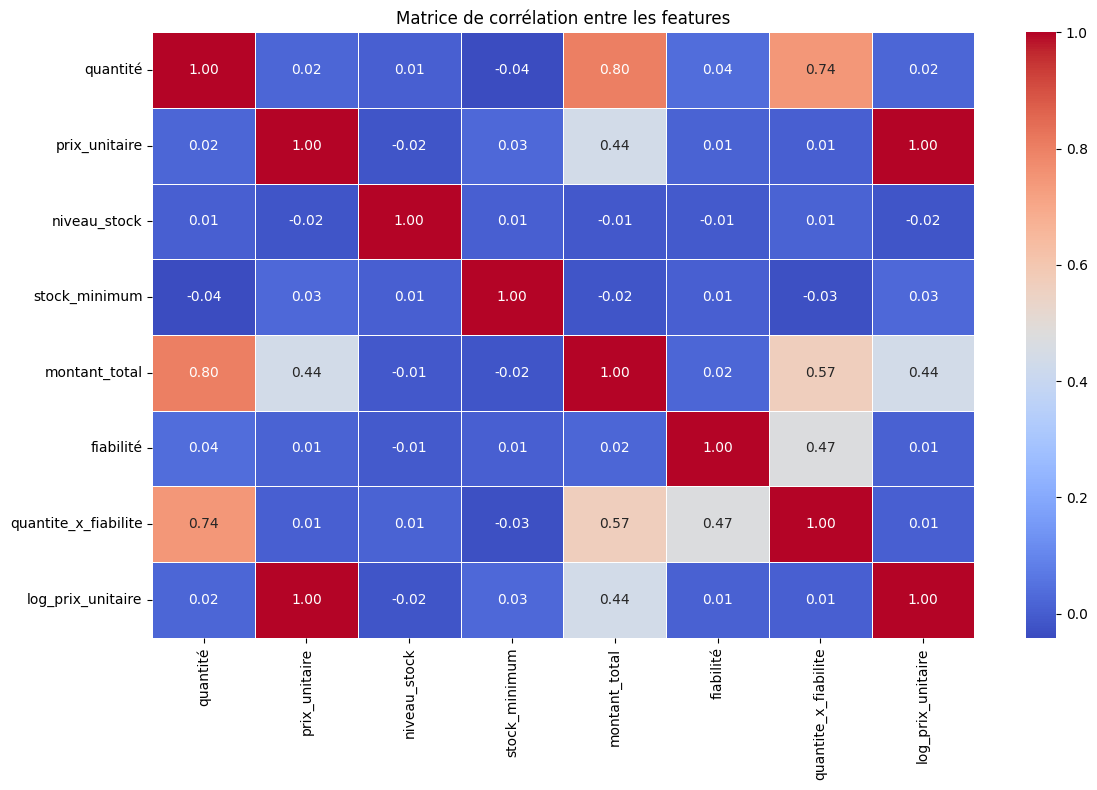

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = X_test_fe.corr()

# Affichage avec heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les features")
plt.tight_layout()
plt.show()


In [260]:
print(y.value_counts(normalize=True))

delai_court
0    0.6847
1    0.3153
Name: proportion, dtype: float64


In [276]:
corrs = data.corr(numeric_only=True)['delai_court'].sort_values(ascending=False)
print(corrs)

import pandas as pd

# One-hot encoding sur toutes les colonnes de type 'object'
data_hot = pd.get_dummies(data, drop_first=True)

print(data_hot.info())
print(data_hot.head())

delai_court              1.000000
stock_minimum            0.015570
niveau_stock             0.014331
montant_total            0.008168
quantité                 0.006806
délai_moyen_jours        0.003697
prix_unitaire            0.003264
fiabilité                0.003003
mois                    -0.001295
jour_semaine            -0.001633
prix                    -0.003933
délai_livraison_jours   -0.802334
année                         NaN
Name: delai_court, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 11538 entries, quantité to entrepot_Paris
dtypes: bool(11525), float64(4), int64(9)
memory usage: 110.9 MB
None
   quantité  prix_unitaire  délai_livraison_jours  montant_total  mois  année  \
0       150         129.62                     14        19443.0     3   2024   
1        50         110.81                      8         5540.5     6   2024   
2        75         140.58                      8        10543.5     1   2024   
3   

In [279]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()

# Encoder les colonnes demandées
cols_to_encode = ['pays', 'ville', 'nom_fournisseur', 'id_produit', 'date_achat']
for col in cols_to_encode:
    if col in data_encoded.columns:
        data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col].astype(str))

# Vérification
print(data_encoded[cols_to_encode].head())
print(data_encoded[cols_to_encode].dtypes)

   pays  ville  nom_fournisseur  id_produit  date_achat
0     4      5               17         626          81
1     0      1               11         468         163
2    13     14               32         848          18
3     0      1               11         483         324
4    10     13               49         195         366
pays               int64
ville              int64
nom_fournisseur    int64
id_produit         int64
date_achat         int64
dtype: object


   date_achat  id_produit  quantité  prix_unitaire  délai_livraison_jours  \
0   -0.965441    0.426165  0.512170      -0.305617               1.610006   
1   -0.190932   -0.122828 -0.502279      -0.530462               0.011747   
2   -1.560489    1.197535 -0.248667      -0.174606               0.011747   
3    1.329748   -0.070708  4.062745      -0.411405               0.278124   
4    1.726448   -1.071404 -0.502279       1.205666               1.343630   

   montant_total      mois  année  jour_semaine      prix  stock_minimum  \
0       0.202581 -1.023749    0.0      0.507992 -1.546298      -1.390470   
1      -0.517299 -0.155478    0.0     -0.486316 -1.648065      -1.390470   
2      -0.258240 -1.602596    0.0      0.507992 -1.384617       1.171119   
3       2.322581  1.291640    0.0     -0.486316  0.008330      -0.562880   
4      -0.141268 -0.155478    0.0      0.507992  0.673891      -0.799334   

   nom_fournisseur     ville      pays  fiabilité  délai_moyen_jours  \
0       

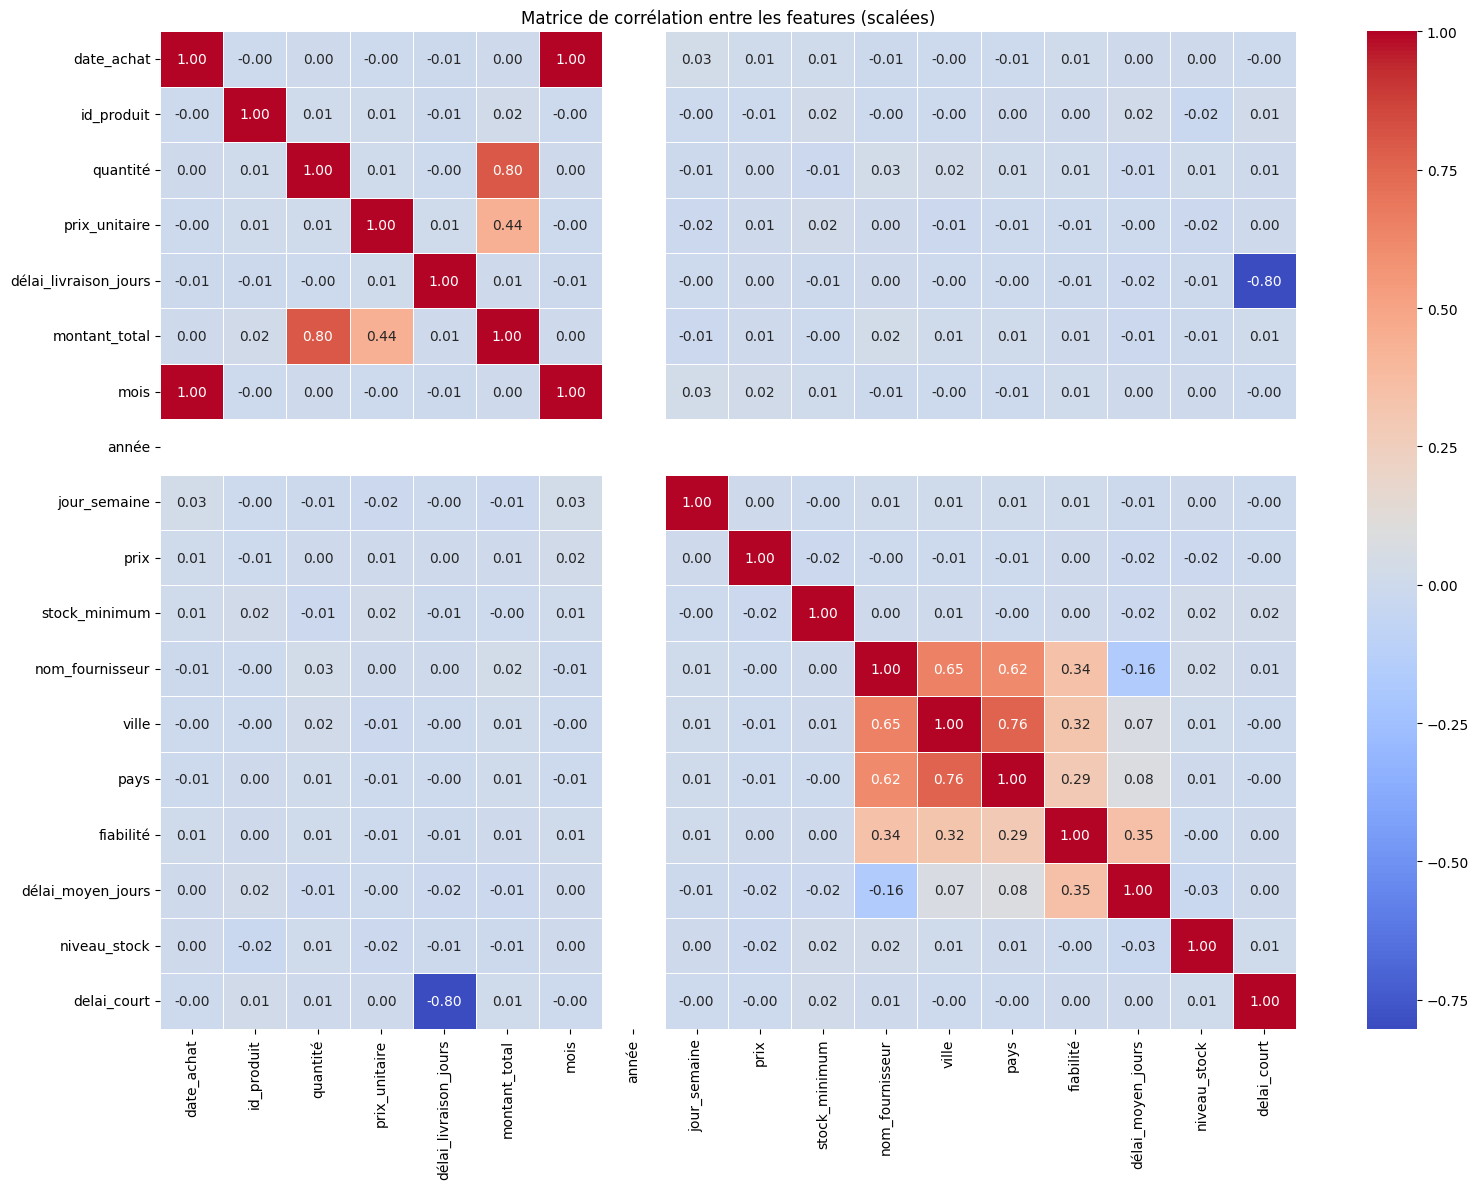

In [286]:
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les colonnes numériques pour le scaling
numeric_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
data_scaled = data_encoded.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

# Vérification
print(data_scaled[numeric_cols].head())

# Calcul de la matrice de corrélation sur les données scalées
corr_matrix = data_scaled.corr(numeric_only=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les features (scalées)")
plt.tight_layout()
plt.show()

y_train: [5491 2508]
y_test: [1355  645]
[[ 1.         -0.80446703]
 [-0.80446703  1.        ]]


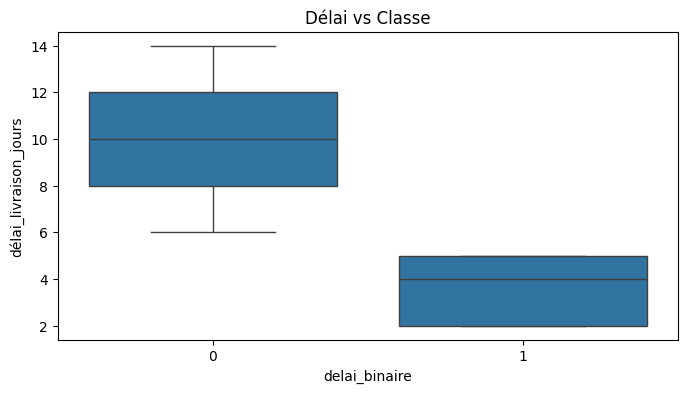

In [291]:
# Vérifier la distribution des classes
print("y_train:", np.bincount(y_train_clf))
print("y_test:", np.bincount(y_test_clf))

# Vérifier la corrélation de délai_livraison_jours avec la cible sur le train split d'origine
if 'délai_livraison_jours' in data.columns:
	# Utiliser y_train_clf et y_train_delai qui sont alignés
	delais_train = y_train_delai
	print(np.corrcoef(delais_train, y_train_clf))

	# Afficher un boxplot
	import seaborn as sns
	import matplotlib.pyplot as plt

	plt.figure(figsize=(8,4))
	sns.boxplot(x=y_train_clf, y=delais_train)
	plt.title("Délai vs Classe")
	plt.show()
else:
	print("La colonne 'délai_livraison_jours' n'existe pas dans le DataFrame 'data'.")


In [292]:
features_sans_delai = [f for f in features if f != 'délai_livraison_jours']


In [295]:
# Ajoute 'fiabilité' et 'prix_unitaire' à la liste des colonnes si elles n'y sont pas déjà
cols_with_fiabilite = features_sans_delai.copy()
if 'fiabilité' not in cols_with_fiabilite:
	cols_with_fiabilite.append('fiabilité')
if 'prix_unitaire' not in cols_with_fiabilite:
	cols_with_fiabilite.append('prix_unitaire')
if 'quantité' not in cols_with_fiabilite:
	cols_with_fiabilite.append('quantité')

# Train set
X_train_fe = pd.DataFrame(X_train, columns=cols_with_fiabilite)
X_train_fe['quantite_x_fiabilite'] = X_train_fe['quantité'] * X_train_fe['fiabilité']
X_train_fe['log_prix_unitaire'] = np.log1p(X_train_fe['prix_unitaire'])

# Test set
X_test_fe = pd.DataFrame(X_test, columns=cols_with_fiabilite)
X_test_fe['quantite_x_fiabilite'] = X_test_fe['quantité'] * X_test_fe['fiabilité']
X_test_fe['log_prix_unitaire'] = np.log1p(X_test_fe['prix_unitaire'])


In [304]:
# Sélectionner uniquement les colonnes numériques pour l'imputation et le scaling
numeric_cols = [col for col in X_train_fe.columns if np.issubdtype(X_train_fe[col].dtype, np.number)]

# Imputation sur les colonnes numériques
X_train_num_arr = imputer.fit_transform(X_train_fe[numeric_cols])
X_test_num_arr = imputer.transform(X_test_fe[numeric_cols])

# Vérifier la forme avant de créer le DataFrame
# Utiliser les colonnes effectivement utilisées par l'imputer pour éviter les erreurs de shape
imputed_cols = X_train_fe[numeric_cols].columns[X_train_fe[numeric_cols].notna().any()].tolist()
X_train_num = pd.DataFrame(X_train_num_arr, columns=imputed_cols, index=X_train_fe.index)
X_test_num = pd.DataFrame(X_test_num_arr, columns=imputed_cols, index=X_test_fe.index)
# Scaling sur les colonnes numériques
X_train_num_scaled = pd.DataFrame(scaler_mm.fit_transform(X_train_num), columns=imputed_cols, index=X_train_fe.index)
X_test_num_scaled = pd.DataFrame(scaler_mm.transform(X_test_num), columns=imputed_cols, index=X_test_fe.index)# Scaling sur les colonnes numériques
X_train_num_scaled = pd.DataFrame(scaler_mm.fit_transform(X_train_num), columns=imputed_cols, index=X_train_fe.index)
X_test_num_scaled = pd.DataFrame(scaler_mm.transform(X_test_num), columns=imputed_cols, index=X_test_fe.index)
# Scaling sur les colonnes numériques
X_train_num_scaled = pd.DataFrame(scaler_mm.fit_transform(X_train_num), columns=imputed_cols, index=X_train_fe.index)
X_test_num_scaled = pd.DataFrame(scaler_mm.transform(X_test_num), columns=imputed_cols, index=X_test_fe.index)

# Si vous avez des colonnes non numériques, concaténez-les après traitement
non_numeric_cols = [col for col in X_train_fe.columns if col not in numeric_cols]
if non_numeric_cols:
	X_train_fe_final = pd.concat([X_train_num_scaled, X_train_fe[non_numeric_cols]], axis=1)
	X_test_fe_final = pd.concat([X_test_num_scaled, X_test_fe[non_numeric_cols]], axis=1)
else:
	X_train_fe_final = X_train_num_scaled
	X_test_fe_final = X_test_num_scaled

# Remplacez les anciens DataFrames par les nouveaux
X_train_fe = X_train_fe_final
X_test_fe = X_test_fe_final


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['fiabilité' 'prix_unitaire' 'quantite_x_fiabilite' 'log_prix_unitaire']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['fiabilité' 'prix_unitaire' 'quantite_x_fiabilite' 'log_prix_unitaire']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Régression Logistique
# Align indices to avoid shape mismatch
X_train_fe_aligned, y_train_clf_aligned = X_train_fe.align(y_train_clf, join='inner', axis=0)
logreg = LogisticRegression()
logreg.fit(X_train_fe_aligned, y_train_clf_aligned)
y_pred_log = logreg.predict(X_test_fe)
y_proba_log = logreg.predict_proba(X_test_fe)[:, 1]

print("Logistic Regression :")
print(classification_report(y_test_clf, y_pred_log))

# Random Forest
# Align indices to avoid shape mismatch
X_train_fe_rf, y_train_clf_rf = X_train_fe.align(y_train_clf, join='inner', axis=0)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_fe_rf, y_train_clf_rf)
y_pred_rf = rf.predict(X_test_fe)
y_proba_rf = rf.predict_proba(X_test_fe)[:, 1]

print("Random Forest :")
print(classification_report(y_test_clf, y_pred_rf))


Logistic Regression :
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1355
           1       0.00      0.00      0.00       645

    accuracy                           0.68      2000
   macro avg       0.34      0.50      0.40      2000
weighted avg       0.46      0.68      0.55      2000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Random Forest :
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1355
           1       0.31      0.27      0.29       645

    accuracy                           0.57      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.56      0.57      0.56      2000



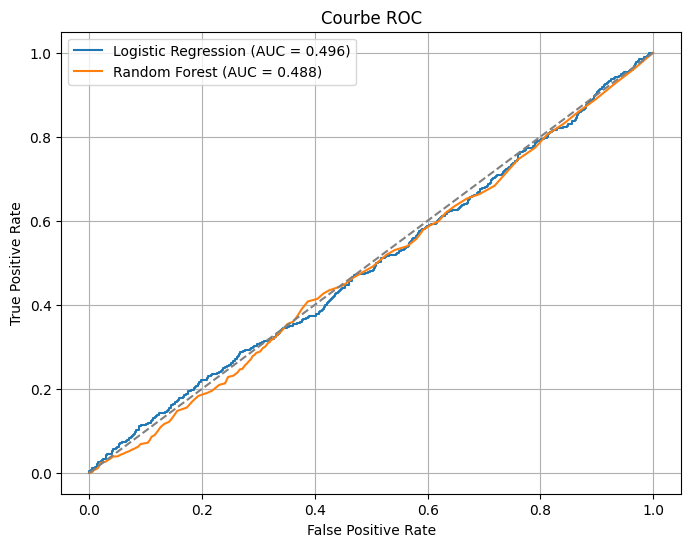

In [309]:
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test_clf, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test_clf, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc_score(y_test_clf, y_proba_log)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.3f})'.format(roc_auc_score(y_test_clf, y_proba_rf)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.grid(True)
plt.show()
